In [1]:
import trig_poly
import dual_certificates
import test_data
import numpy as np
import plt_util
import phase_transition
from matplotlib import pyplot as plt

%matplotlib inline

In [63]:
reload(test_data)
reload(dual_certificates)
reload(trig_poly)

m = 10
fc = 50
min_separation = 0.65 / fc
N = int(1.0 / min_separation)

kernel = trig_poly.TrigPoly.dirichlet(fc)

support = test_data.jittered_supports(N, min_separation=min_separation)
sign_pattern = test_data.uniform_sign_pattern_multidim(N, m)

In [64]:
freqs = range(-fc, fc + 1)

A = np.zeros((N, len(freqs))) + 1j * np.zeros((N, len(freqs)))
for i, t in enumerate(support):
    for j, f in enumerate(freqs):
        A[i, j] = np.exp(2.0 * np.pi * 1j * f * t)
AAT = np.dot(A, A.conj().T)

In [65]:
polys = []
for k in range(m):
    this_sign_pattern = sign_pattern[:, k]
    
    intermediate = np.linalg.solve(AAT, this_sign_pattern)
    coeffs = np.dot(A.conj().T, intermediate)
    
    polys.append(trig_poly.TrigPoly(freqs, coeffs))

In [66]:
interpolator = trig_poly.MultiTrigPoly(polys)

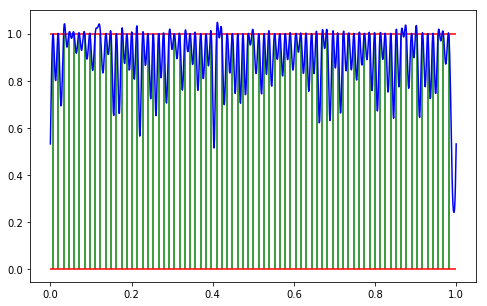

In [67]:
plt.subplots(figsize=(8, 5))

plt_util.plot_trig_poly_magnitude(interpolator)
plt_util.plot_support_magnitude_lines(support)
plt_util.plot_magnitude_bounds()

In [52]:
print dual_certificates.validate(support, sign_pattern, interpolator)

{'status': False, 'max_deviation': 8.5649676929752524e-15, 'values_achieved': True, 'bound_achieved': False}
